In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
# The file contains timestamps of user logins in a particular geographic location.

df_logins = pd.read_json("logins.json")
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df_logins.shape

(93142, 1)

In [4]:
df_logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
df_logins.sort_values("login_time").reset_index(drop = True)

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37
...,...
93137,1970-04-13 18:48:52
93138,1970-04-13 18:50:19
93139,1970-04-13 18:54:02
93140,1970-04-13 18:54:23


In [7]:
#duplicates = df_logins.duplicated()
#df_logins[duplicates]

In [7]:
count_dups = pd.DataFrame(df_logins.login_time.value_counts())
count_dups[count_dups.login_time != 1]

,login_time
1970-02-12 11:16:53,3
1970-02-24 23:09:57,3
1970-03-29 03:24:57,3
1970-03-14 17:45:52,3
1970-01-09 01:31:25,3
...,...
1970-02-19 02:08:43,2
1970-03-07 23:00:33,2
1970-03-08 19:07:55,2
1970-01-04 03:09:00,2


In [31]:
count_dups[count_dups.login_time == 3].count()

login_time    9
dtype: int64

In [32]:
count_dups[count_dups.login_time == 2].count()

login_time    859
dtype: int64

Up until this point, we know that the data has a single column 'login_time' with datetime64 datatype and 93142 observations.

There are no missing values.

There are 877 duplicate values out of which 9 values are duplicated 3 times and 859 values are duplicated 2 times.
However, since we do not know how the data was collected, we cannot comment on the inconsistency. We will treat these values as valid for further analysis.


## Part 1. Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [8]:
# Since sampling can be applied to DatetimeIndex, TimedeltaIndex or PeriodIndex and not to Rangeindex

df_logins = df_logins.set_index("login_time")
df_logins.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [9]:
df_logins["CountfifteenMins"] = 0
df_logins = df_logins.resample("15min").count()
df_logins.head()

,CountfifteenMins
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [10]:
# Getting important insights

df_logins["DayOfWeek"] = pd.DatetimeIndex(df_logins.index).dayofweek
df_logins["Hour"] = pd.DatetimeIndex(df_logins.index).hour
df_logins["Month"] = pd.DatetimeIndex(df_logins.index).month
df_logins.head()

,CountfifteenMins,DayOfWeek,Hour,Month
login_time,,,,
1970-01-01 20:00:00,2,3,20,1
1970-01-01 20:15:00,6,3,20,1
1970-01-01 20:30:00,9,3,20,1
1970-01-01 20:45:00,7,3,20,1
1970-01-01 21:00:00,1,3,21,1


In [37]:
df_logins.shape

(9788, 4)

Text(0.5, 1.0, 'No of logins w.r.t 15 mins interval over 4 months')

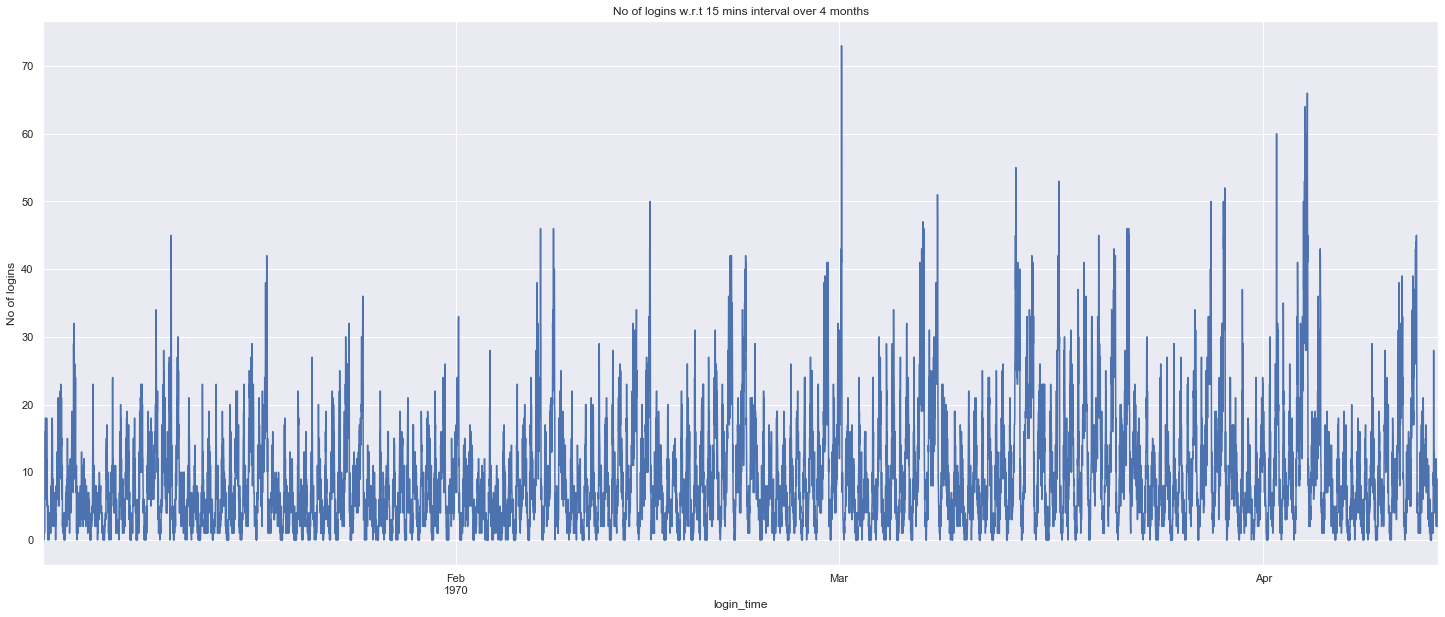

In [39]:
sns.set(rc={'figure.figsize':(25, 10)})

df_logins["CountfifteenMins"].plot()
plt.ylabel("No of logins")
plt.title("No of logins w.r.t 15 mins interval over 4 months")

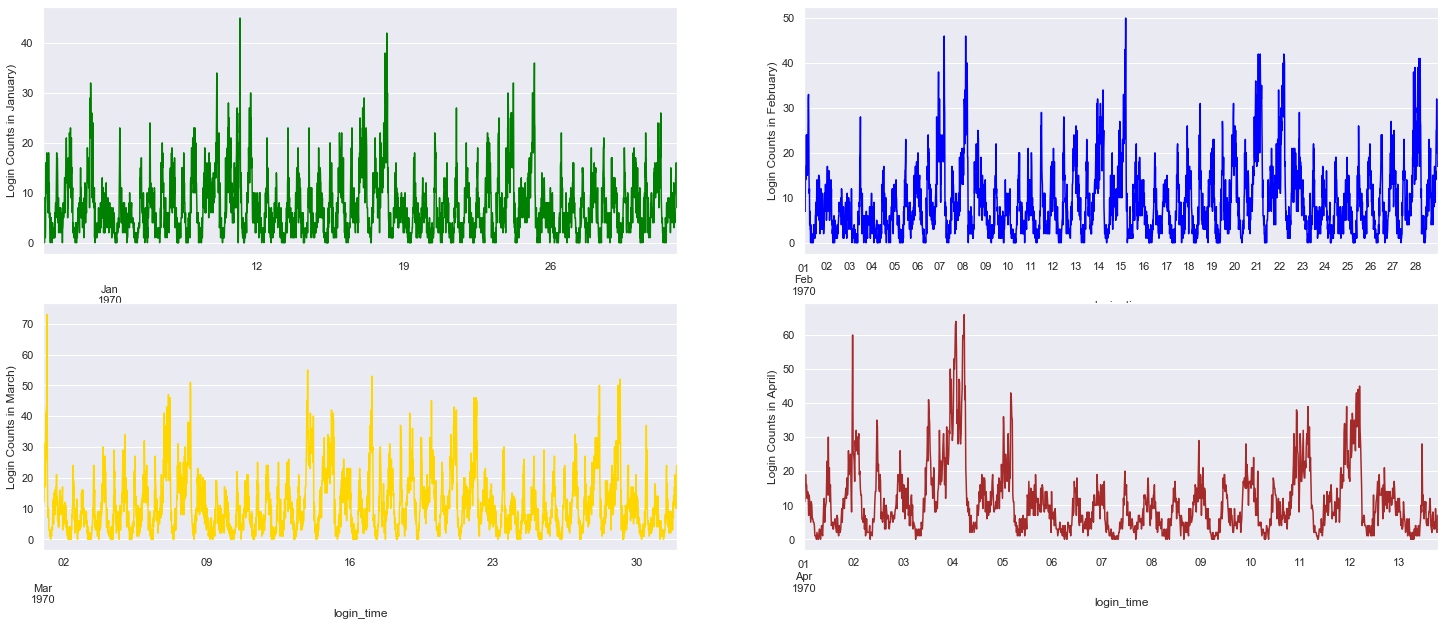

In [52]:
#sns.set(rc={'figure.figsize':(25, 10)})

plt.subplot(2,2,1)
ax = df_logins.loc['1970-01', 'CountfifteenMins'].plot(color = "green")
ax.set_ylabel('Login Counts in January)');

plt.subplot(2,2,2)
ax = df_logins.loc['1970-02', 'CountfifteenMins'].plot(color = "blue")
ax.set_ylabel('Login Counts in February)');

plt.subplot(2,2,3)
ax = df_logins.loc['1970-03', 'CountfifteenMins'].plot(color = "gold")
ax.set_ylabel('Login Counts in March)');

plt.subplot(2,2,4)
ax = df_logins.loc['1970-04', 'CountfifteenMins'].plot(color = "brown")
ax.set_ylabel('Login Counts in April)');

The above plots show that all the months have a cyclic pattern of login activity which we will explore further.

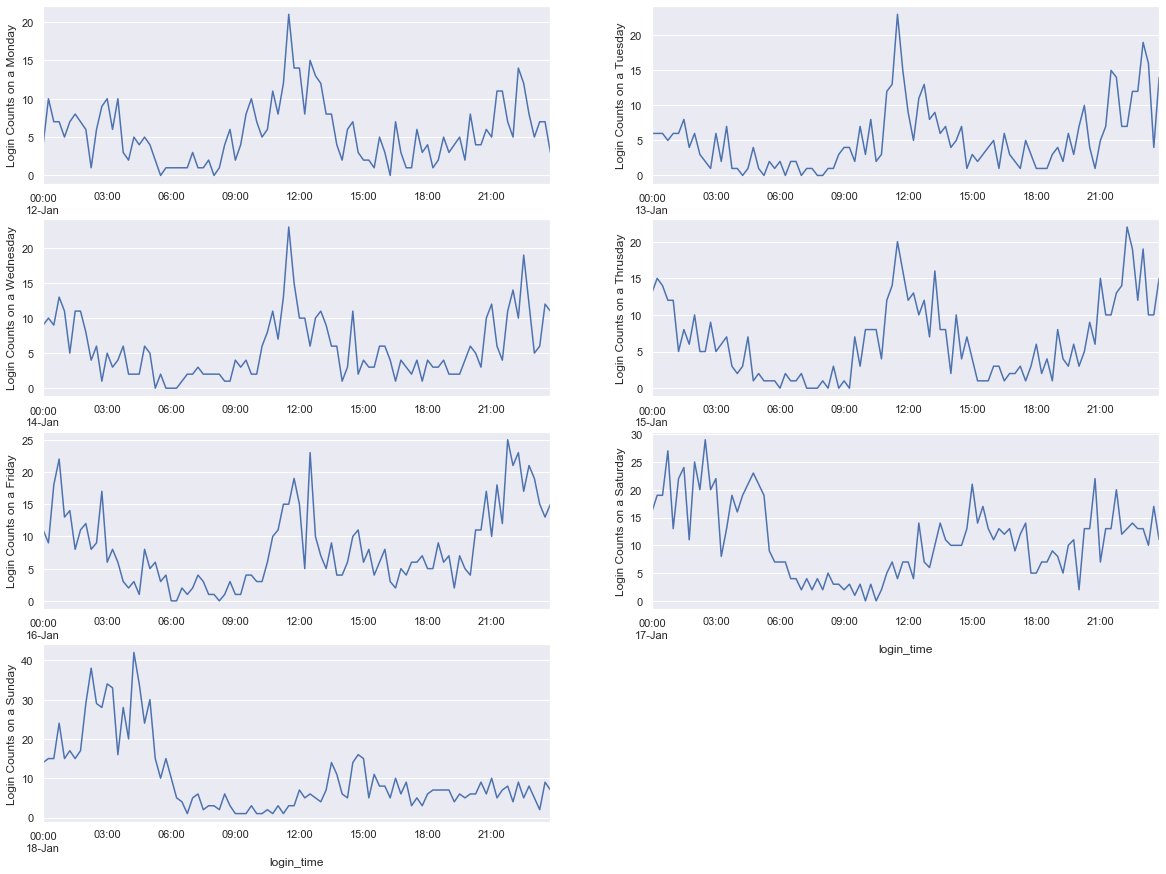

In [69]:
sns.set(rc={'figure.figsize':(20, 15)})

plt.subplot(4,2,1)
ax = df_logins.loc['1970-01-12', 'CountfifteenMins'].plot()
ax.set_ylabel('Login Counts on a Monday');

plt.subplot(4,2,2)
ax = df_logins.loc['1970-01-13', 'CountfifteenMins'].plot()
ax.set_ylabel('Login Counts on a Tuesday');

plt.subplot(4,2,3)
ax = df_logins.loc['1970-01-14', 'CountfifteenMins'].plot()
ax.set_ylabel('Login Counts on a Wednesday');

plt.subplot(4,2,4)
ax = df_logins.loc['1970-01-15', 'CountfifteenMins'].plot()
ax.set_ylabel('Login Counts on a Thrusday');


plt.subplot(4,2,5)
ax = df_logins.loc['1970-01-16', 'CountfifteenMins'].plot()
ax.set_ylabel('Login Counts on a Friday');


plt.subplot(4,2,6)
ax = df_logins.loc['1970-01-17', 'CountfifteenMins'].plot()
ax.set_ylabel('Login Counts on a Saturday');


plt.subplot(4,2,7)
ax = df_logins.loc['1970-01-18', 'CountfifteenMins'].plot()
ax.set_ylabel('Login Counts on a Sunday');

Since looking at a random single day would bias our results, we will aggregate all the login counts over the day of week.

In [59]:
df_week = df_logins.groupby("DayOfWeek", as_index = False).CountfifteenMins.count()
df_week

,DayOfWeek,CountfifteenMins
0,0,1420
1,1,1344
2,2,1344
3,3,1360
4,4,1440
5,5,1440
6,6,1440


In [60]:
df_week = df_logins.groupby("DayOfWeek", as_index = False).CountfifteenMins.sum()
df_week

,DayOfWeek,CountfifteenMins
0,0,8823
1,1,9268
2,2,10339
3,3,11960
4,4,15208
5,5,19377
6,6,18167


Text(0.5, 1.0, 'Logins by Day of Week')

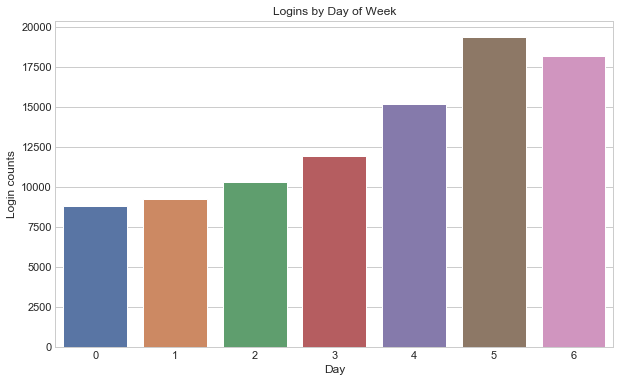

In [95]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,6)) 


sns.barplot(x = 'DayOfWeek', y = 'CountfifteenMins', data = df_week)
plt.xlabel('Day')
plt.ylabel('Login counts')
plt.title('Logins by Day of Week')

As can be observed, the highest logins are for Day 5 i.e. Saturday and Sunday is at number two.

The lowest logins are for Monday and they gradually increase till Saturday and then start declining.

Thus, it is evident that weekends get the most number of logins.

However, it is also to note that the count of logins was little less for Day 1, 2, 3 hence it might make a difference.

In [97]:
df_hour = df_logins.groupby("Hour", as_index = False).CountfifteenMins.sum()
df_hour.head()

,Hour,CountfifteenMins
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034


Text(0.5, 1.0, 'Logins by Day of Week')

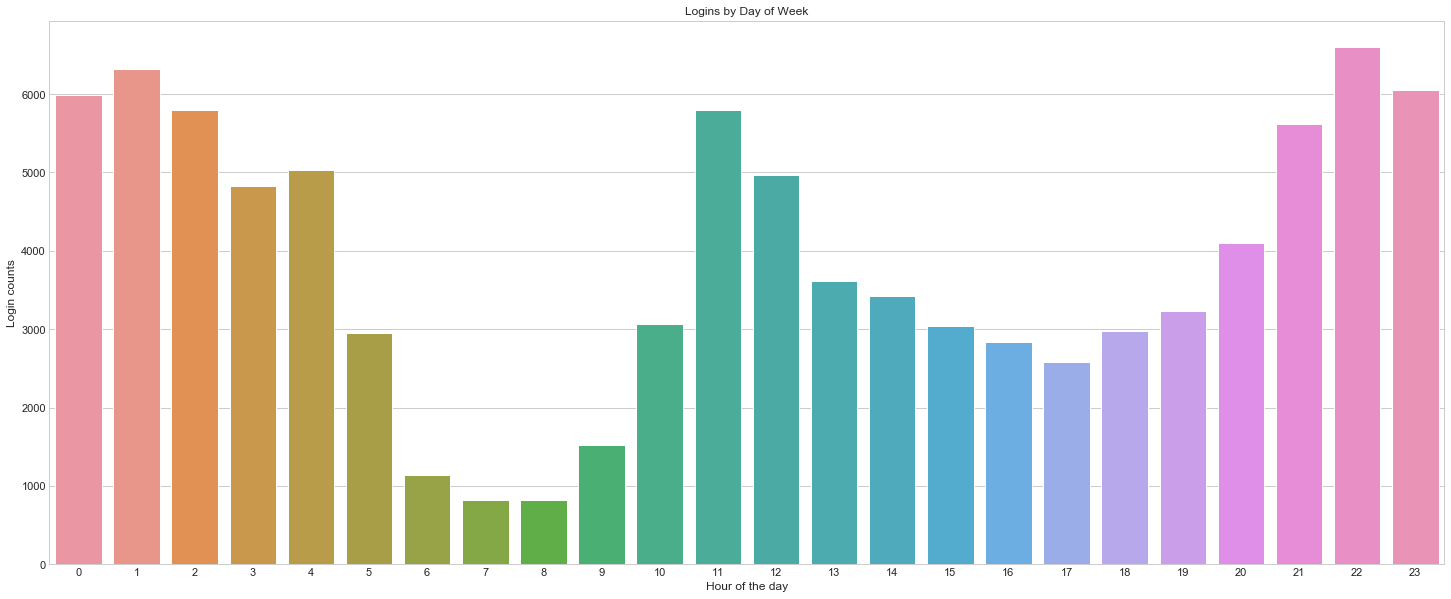

In [98]:
sns.barplot(x = "Hour", y = "CountfifteenMins", data = df_hour)
plt.xlabel("Hour of the day")
plt.ylabel("Login counts")
plt.title('Logins by Day of Week')

As can be observed, people mostly login at night. For e.g. from 20:00 to 2:00 the logins are higher than most of the other hours.

Even during the day, the logins tend to increase at around and between 11:00 and 12:00 which is generally lunch time.

The lowest logins are for morning time at around 7:00 and 8:00.
        


Text(0.5, 1.0, 'Month wise statistics of login counts')

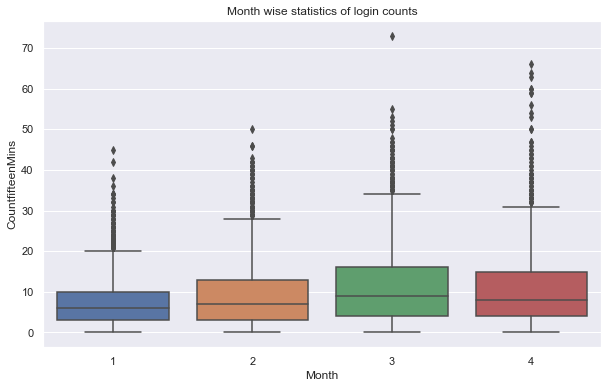

In [35]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.boxplot(data = df_logins, x = "Month", y = "CountfifteenMins")
plt.title("Month wise statistics of login counts")


The number of logins counts are increasing from Jan to March which is a good indicator that more people are using the app.

However, for April we are not sure why there is a sudden decrease. Hence, let us first analyse the data available.

In [100]:
df_month = df_logins.groupby("Month", as_index = False).CountfifteenMins.count()
df_month

,Month,CountfifteenMins
0,1,2896
1,2,2688
2,3,2976
3,4,1228


In [101]:
df_month = df_logins.groupby("Month", as_index = False).CountfifteenMins.sum()
df_month

,Month,CountfifteenMins
0,1,21239
1,2,24673
2,3,33723
3,4,13507


The count data for all the 4 months is not much varried except for April month which has less than half of the login count data (this might create a bias).

In [113]:
df_day_hour = df_logins.groupby(["DayOfWeek", "Hour"], as_index = False).CountfifteenMins.sum()
df_day_hour.head()

,DayOfWeek,Hour,CountfifteenMins
0,0,0,531
1,0,1,414
2,0,2,312
3,0,3,236
4,0,4,206


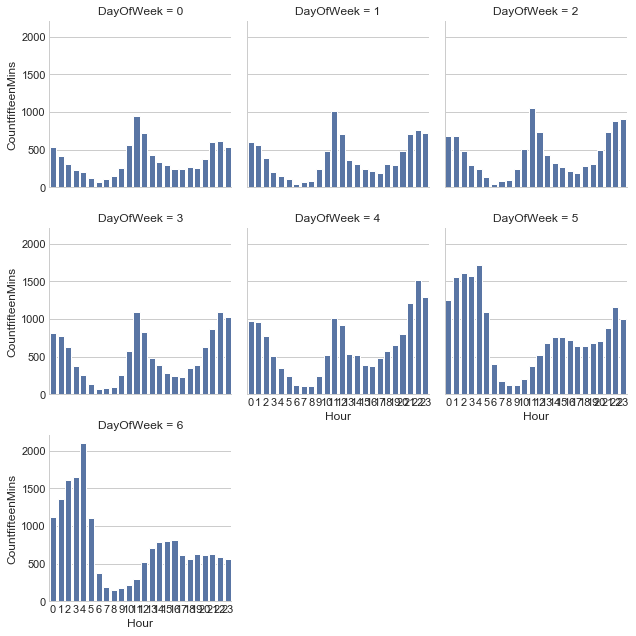

In [117]:
graph = sns.FacetGrid(df_day_hour, col="DayOfWeek", col_wrap = 3)
graph.map(sns.barplot, "Hour", "CountfifteenMins", order=range(0,24))

When we observed Day of Week and Hour together: Monday, Tuesday, Wednesday and Thursday showed very similiar trends i.e most logins at late night and during lunch hours.

Friday shows more increase in the mid-night time i.e around 22:00 and 23:00.

For Saturday and Sunday, most logins are during post mid-night time.



    
    

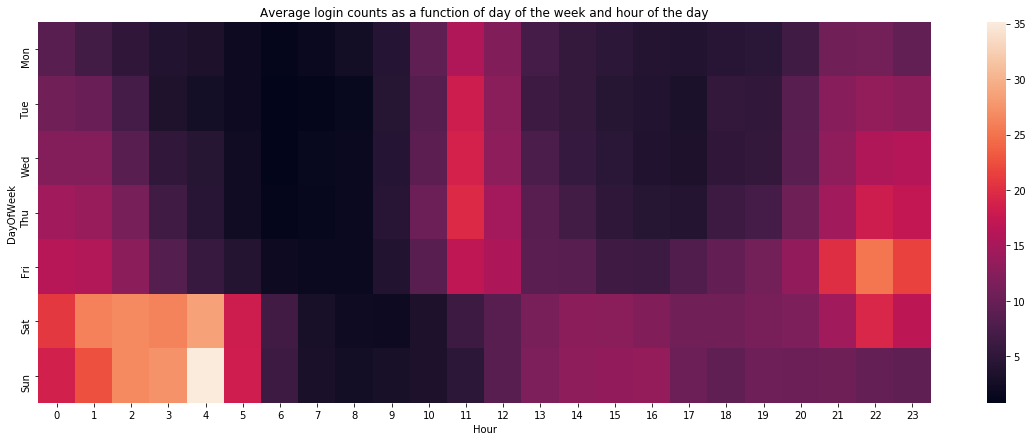

In [21]:
login_map = pd.pivot_table(df_logins, index = "DayOfWeek", columns = "Hour", values = "CountfifteenMins", aggfunc="mean")

plt.figure(figsize=(20,7))
ax = sns.heatmap(login_map);
ax.set_title("Average login counts as a function of day of the week and hour of the day");
ax.set_yticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun']);

This above plot further corroborates our findings:

1. Weekends i.e. Saturday and Sunday see the highest logins around post mid-night.
2. The weekdays i.e. Monday to Friday see spiked logins during noon time and then few in the late night time.
3. Friday sees high number of logins during night around 21:00 to 23:00
4. The time between 6:00 to 9:00 and 15:00 to 20:00 remains mostly inactive for logins during the weekdays.

## Part 2. Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.


### What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

The metric to be chosen as the key measure of success of this experiment in encouraging driver partners to serve both cities should be based on:

1. Feasibilty of collecting metric data and measuring it.
2. The metric should be able to measure the success in both the cities and not just any one of them.
3. The metric can be evaluated.
4. A quick note is that we cannot expect a single driver, for weekdays, to serve Metropolis in daytime and Gotham in the night since this would mean to be working for more than 12 hours. Although some drivers might be able to do this, it is not generally expected.

With that in mind, there are various key metrics which can be used either individually or combined:

1. Increase/Decrease in Revenue after introducing this experiment. However, it would be more beneficial to take out the reimbursement cost from the Revenue and then compare the before and after values. This would allow stakeholders to analyse the actual profit they are making and if reimbursement of toll costs if going to help them or not.

2. Increase in User sign ups or Registrations from both the cities. This can be further combined with number of increased logins from new as well as existing users.

3. An important measure if the experiment is working or not is by counting the increase in number of trips of the drivers across the toll bridge. This can be done by measuring if the drivers previously exclusive to Gotham are now able to take trip in Metropolis also and vice versa or the numbers of trips have increase for drivers serving both cities who were previously not able to take more trips due to toll cost issue. For weekends, since both cities are active throughout the day, it is more beneficial to measure the number of cross city trips taken by the drivers.

4. Further significant metrics are increased availibility of drivers in both the cities and less wait times for people booking a cab.


### Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

#### a. how you will implement the experiment

We can start with A/B testing wherein the control group is the group of drivers who continue to operate without reimbursement of toll costs and the test group would be the group with the facility to reimburse their toll costs if they take a trip to another city (either Gotham or Metropolis).

Let's say there are X drivers who currently take trips in Gotham only and Y drivers who take trips in Metropolis only. Further, there might be existing drivers who would be currently taking inter-city trips even without the reimbursements, let this count be Z. Now we should divide these X+Y+Z drivers in A and B group randomly. For initial proposal, Let X/2 + Y/2 + Z/2 be in group A by random sampling and the remaining in group B. These groups should be tested for alteast 3 months (or the stakeholders can decide the time to run these experiments) to measure some significant metrics. As a next step, we can randomly shuffle the drivers again and then measure the metrics. This shuffling would help in reducing any bias, if any.

The metrics that can be measured are Revenue after reimbursements costs, increase in availibility of the drivers in both the cities (which is somewhat related to decrease in waiting time for customers), increase in inter-city trips, and finally increase in user sign ups and registrations.

#### b. what statistical test(s) you will conduct to verify the significance of the observation

The significance of the test can be verified by doing two sample t-test on the two groups. This allows us to evaluate the metrics for each group with the toll reimbursement offer as the only variable.

After enough data are collected, we will compute:

1. A two-sample t statistic to determine if the average time drivers spend in their non-associated city is significant different between the test and control group.
 
2. A t-test with a confidence level of 95%, wherein the Null Hypothesis is that the reimbursing toll costs for drivers does not have a statistically significant impact on Ultimate's net profits.

#### c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

After the test results are computed, there can be cases like:

1. The results are significant i.e p value is small then an informed decision can be made with the help of the collected data. If required, the experiment can be run for more time to confidently convince the stakeholders. 

2. The results are not significant and cannot convince the team if they should carry out with the reimbursement plans. In this case also, if there is some potential, we can increase the time to run the experiment. 

The caveats can be:

1. The significant changes might be observed only for weekends since on weekdays both the cities have complementry activities. And due to this, the drivers would not be able to serve both the cities due to increased work hours.

2. Even if the result is significant, then also it should be taken care to properly collect more data with different parameters.


## Part 3. Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention.


Data Description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYY MM DD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

### Importing and Cleaning Data

In [170]:
import json

with open ('ultimate_data_challenge.json') as file:
    data = json.load(file)
    
data = pd.DataFrame(data)
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [114]:
data.shape

(50000, 12)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [9]:
data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [116]:
data["phone"].isnull().value_counts()

False    49604
True       396
Name: phone, dtype: int64

In [117]:
data["avg_rating_of_driver"].isnull().value_counts()

False    41878
True      8122
Name: avg_rating_of_driver, dtype: int64

In [118]:
data["avg_rating_by_driver"].isnull().value_counts()

False    49799
True       201
Name: avg_rating_by_driver, dtype: int64

In [15]:
# There are missing values in avg_rating_by_driver, phone and avg_rating_of_driver.
# There are 2 date related columns which should be converted into DateTime format.

In [171]:
data["last_trip_date"] = pd.to_datetime(data["last_trip_date"])
data["last_trip_date"].head()

0   2014-06-17
1   2014-05-05
2   2014-01-07
3   2014-06-29
4   2014-03-15
Name: last_trip_date, dtype: datetime64[ns]

In [172]:
data["signup_date"] = pd.to_datetime(data["signup_date"])
data["signup_date"].head()

0   2014-01-25
1   2014-01-29
2   2014-01-06
3   2014-01-10
4   2014-01-27
Name: signup_date, dtype: datetime64[ns]

In [173]:
data["phone"] = data["phone"].fillna(data['phone'].mode().iloc[0])

In [174]:
mean_fill = data["avg_rating_by_driver"].mean()
mean_fill = round(mean_fill, 1)
data["avg_rating_by_driver"] = data["avg_rating_by_driver"].fillna(mean_fill)

In [175]:
mean_fill2 = data["avg_rating_of_driver"].mean()
mean_fill2 = round(mean_fill2, 1)
data["avg_rating_of_driver"] = data["avg_rating_of_driver"].fillna(mean_fill2)

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [23]:
# Now the data is ready for further processing

### Data Wrangling

In [33]:
# Let us first check if the sign_up date is for January or not

print("There are total {} signups between {} and {}"
      .format(data["signup_date"].count(), data["signup_date"].min(), data["signup_date"].max()))

print("The last trip date by a user ranges between {} and {}"
     .format(data["last_trip_date"].min(), data["last_trip_date"].max()))

There are total 50000 signups between 2014-01-01 00:00:00 and 2014-01-31 00:00:00
The last trip date by a user ranges between 2014-01-01 00:00:00 and 2014-07-01 00:00:00


In [34]:
# This tells us that the cohort is for the users who signed up in the January month of 2014.
# The last trip date of 2014-07-01 tells us that the data was collected upto June month so we will treat this date as
# the baseline date to calculate active user.

In [177]:
# Let us now see how many users used the app in the last 30 days from 2014-07-01

cutoff = data["last_trip_date"].max() - pd.Timedelta("30 day")
cutoff

Timestamp('2014-06-01 00:00:00')

In [178]:
data["retained"] = data["last_trip_date"].apply(lambda x: 1 if x >= cutoff else 0 )
data["retained"].head()

0    1
1    0
2    0
3    1
4    0
Name: retained, dtype: int64

In [52]:
# data["retained"][data["retained"] == True].count()/len(data)

data["retained"].sum()/data["retained"].count()

0.37608

The above 37.6% are the numbers of users who signed up in the Jan month and took a trip in the last 30 days from 2014-07-01 i.e. they are retained six months later

However, there are some caveats to be kept in mind:

1. The purpose of the analysis is to develop a model that predicts active status at 6 months. The users in this cohort were admitted throughout January, so not have have been enrolled for strictly the same amount of time, nor is the active status calculated above strictly at 6 months for all users.

2. I omit consideration of each users exact signup date because they are all restricted to the same month. 

3. I will also omit date-based features based on signup date because presumably the model will be used in times outside January so it isn't clear that predictions based on these features would generalize. 

4. I will also omit the variable for last trip date because it leaks the target variable.

### Data Exploration

In [53]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


Text(0.5, 1.0, 'Count of retained users w.r.t Ultimate Black User')

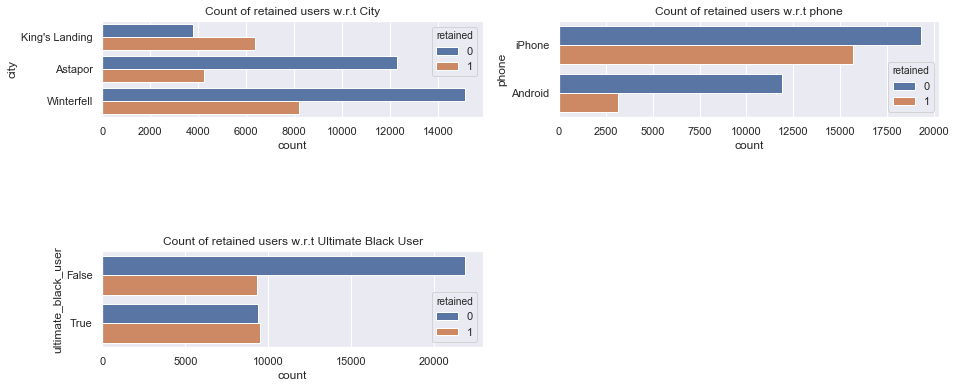

In [76]:
plt.subplot(3,2,1)
sns.countplot(y = "city", hue = "retained", data = data).set_title("Count of retained users w.r.t City")

plt.subplot(3,2,2)
sns.countplot(y = "phone", hue = "retained", data = data).set_title("Count of retained users w.r.t phone")

plt.subplot(3,2,5)
sns.countplot(y = "ultimate_black_user", hue = "retained", data = data).set_title("Count of retained users w.r.t Ultimate Black User")

Text(0.5, 1.0, "Distribution of user's weekday percentage")

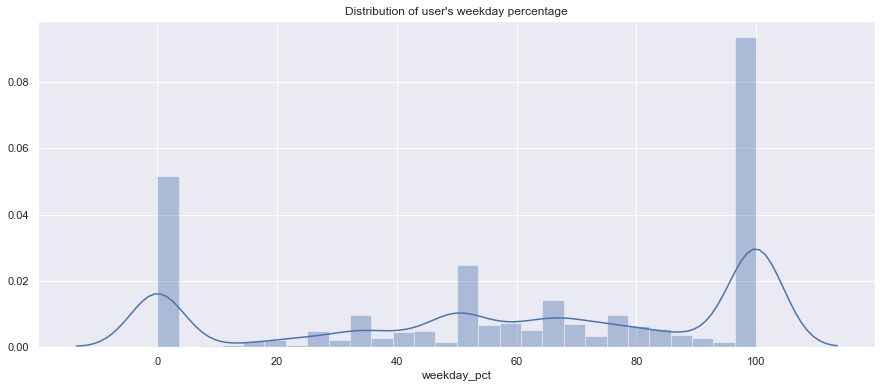

In [164]:
sns.distplot(data["weekday_pct"]).set_title("Distribution of user's weekday percentage")

Text(0.5, 1.0, "Distribution of user's average distance in the first 30 days")

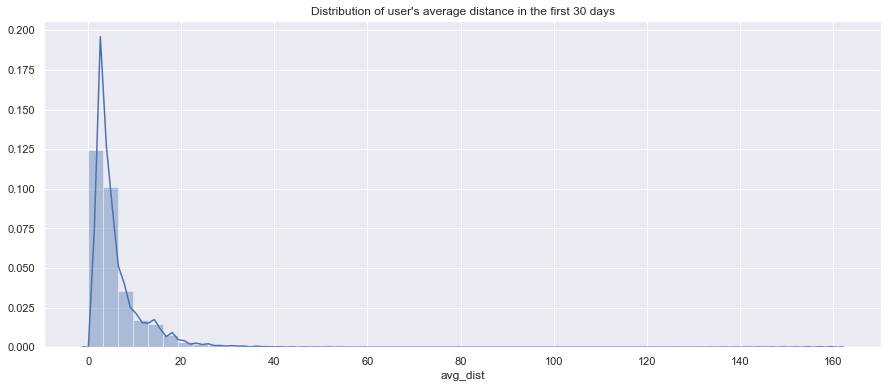

In [160]:
sns.distplot(data["avg_dist"]).set_title("Distribution of user's average distance in the first 30 days")

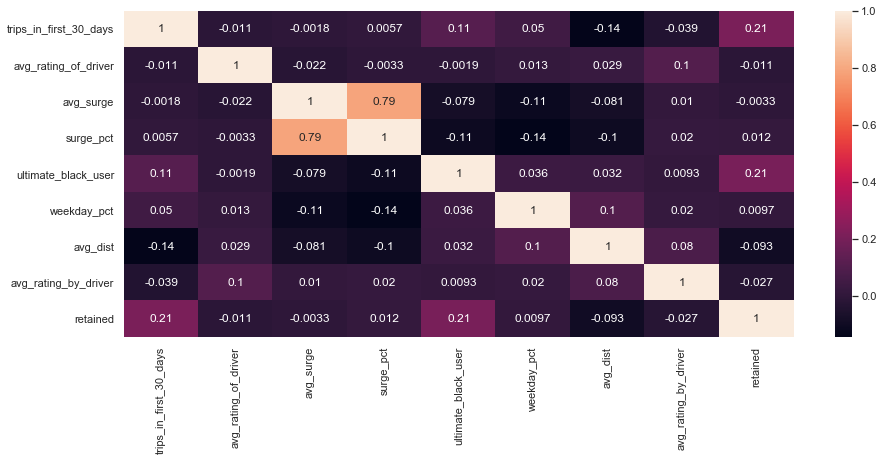

In [72]:
sns.set(rc={'figure.figsize':(15, 6)})

sns.heatmap(data.corr(), annot = True)

The high correlation between avg_surge and surge_pct is as expected since more the number of trips taken with surge multiplier greater than 1, more will be the average surge multiplier over all of the user's trip.

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

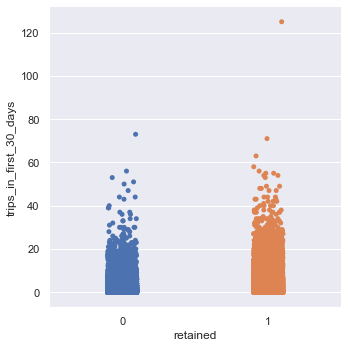

In [81]:
sns.catplot(x="retained", y="trips_in_first_30_days", data=data)

It seems that users taking more trips in first 30 days were more retained.

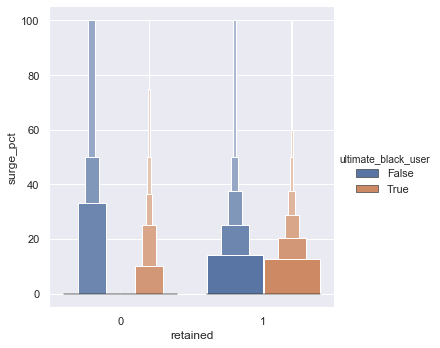

In [143]:
sns.catplot(x="retained", y="surge_pct", hue = "ultimate_black_user", data=data, kind = "boxen")

It seems that people with less surge percentage (and also being an ultimare black user) were able to retain more which is expected since users do not want to pay more than normal fares so they would abandon the app if the fares were usually high.


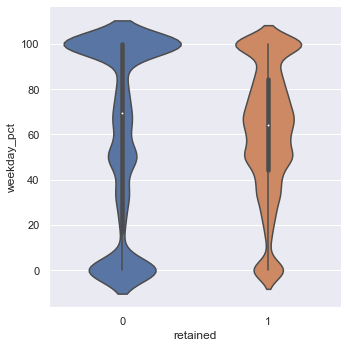

In [147]:
sns.catplot(x="retained", y="weekday_pct", data=data, kind = "violin")

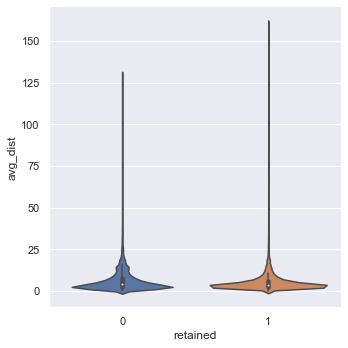

In [163]:
sns.catplot(x="retained", y="avg_dist", data=data, kind = "violin")

Text(0.5, 1.0, 'Distribution of average rating by driver')

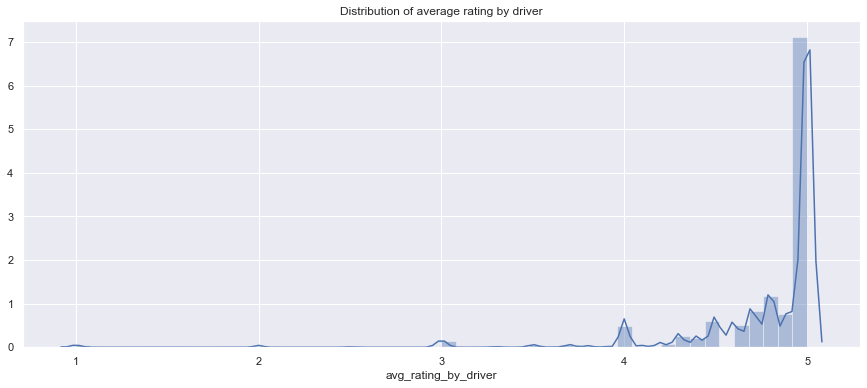

In [131]:
sns.distplot(data["avg_rating_by_driver"]).set_title("Distribution of average rating by driver")

Text(0.5, 1.0, 'Distribution of average rating of driver')

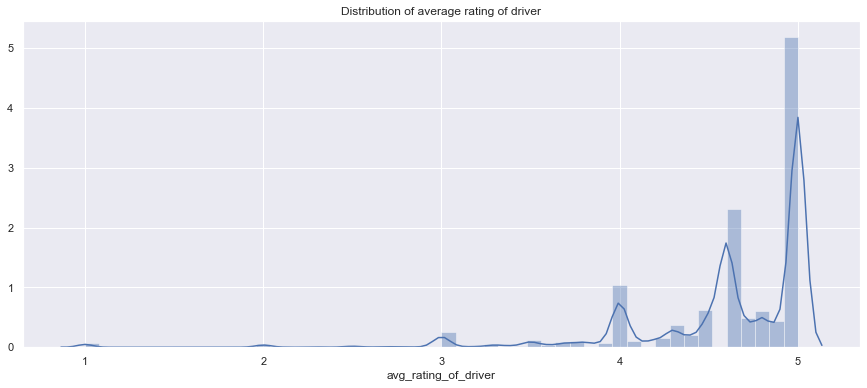

In [132]:
sns.distplot(data["avg_rating_of_driver"]).set_title("Distribution of average rating of driver")

Most of average rating of the driver and by the driver for a user are between 4 and 5.

### Data pre-processing

In [166]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [188]:
data["retained"].value_counts()

0    31196
1    18804
Name: retained, dtype: int64

In [189]:
# We need to remove signup_date and last_trip_date.

# We need to one hot encode city, phone, ultimate_black_user.

# We can avoid feature scaling since many variables are percentage and ratings.

# Although the data is imbalanced, we will move forward with it without any artifical sampling so that it might be able to
# predict on precise data given by the client. If required, we can also compare the model with or 
# without SMOTE()/random sampling

In [179]:
final_df = pd.get_dummies(data, columns = ["city", "phone", "ultimate_black_user"], drop_first = True)
final_df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,1,0,1,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,0,0,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,1,0,1,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,0,1,0,0


In [180]:
final_df = final_df.drop(["last_trip_date", "signup_date"], axis = 1)
final_df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,1,0,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,1,0,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,1,0,0


In [184]:
X = final_df.drop(["retained"], axis = 1)


In [185]:
Y = final_df["retained"]


0        1
1        0
2        0
3        1
4        0
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: retained, Length: 50000, dtype: int64

### Data Modelling

In [193]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

C:\Users\tanvi\Anaconda3\lib\site-packages\dask\dataframe\utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .20, random_state = 44)

In [194]:
list_of_model = ["LogisticRegression", "SVC", "RandomForestClassifier", "XGBoost"]
score_table = pd.DataFrame(index = list_of_model, 
                           columns = ["train_accuracy", "train_F1_score", "test_accuracy", "test_F1_score"])



In [201]:
def compute_results(algo, pred_train, pred_test):
    
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    
    score_table.loc[algo,:] = accuracy_train, f1_train, accuracy_test, f1_test
    
    print("Confusion Matrix results for {} are: \n \n {}".format(algo, classification_report(y_test, pred_test)))

In [204]:
# Logistic Regression

logit = LogisticRegression(max_iter = 500)
logit.fit(X_train, y_train)
pred_train = logit.predict(X_train)
pred_test = logit.predict(X_test)

compute_results("LogisticRegression", pred_train, pred_test)

Confusion Matrix results for LogisticRegression are: 
 
               precision    recall  f1-score   support

           0       0.74      0.86      0.80      6263
           1       0.68      0.50      0.57      3737

    accuracy                           0.72     10000
   macro avg       0.71      0.68      0.68     10000
weighted avg       0.72      0.72      0.71     10000



In [209]:
# SVC

svc = SVC()
svc.fit(X_train, y_train)
pred_train = svc.predict(X_train)
pred_test = svc.predict(X_test)

compute_results("SVC", pred_train, pred_test)

Confusion Matrix results for SVC are: 
 
               precision    recall  f1-score   support

           0       0.76      0.83      0.79      6263
           1       0.66      0.56      0.61      3737

    accuracy                           0.73     10000
   macro avg       0.71      0.69      0.70     10000
weighted avg       0.72      0.73      0.72     10000



In [211]:
# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_train = rfc.predict(X_train)
pred_test = rfc.predict(X_test)

compute_results("RandomForestClassifier", pred_train, pred_test)

Confusion Matrix results for RandomForestClassifier are: 
 
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      6263
           1       0.68      0.67      0.67      3737

    accuracy                           0.76     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.76      0.76      0.76     10000



In [212]:
# XGBoost Classifer

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred_train = xgb.predict(X_train)
pred_test = xgb.predict(X_test)

compute_results("XGBoost", pred_train, pred_test)

Confusion Matrix results for XGBoost are: 
 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      6263
           1       0.75      0.67      0.71      3737

    accuracy                           0.79     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.79      0.79      0.79     10000



In [213]:
print(score_table)

                       train_accuracy train_F1_score test_accuracy  \
LogisticRegression            0.71545       0.566102        0.7233   
SVC                           0.72775       0.607822        0.7286   
RandomForestClassifier       0.997075       0.996109        0.7566   
XGBoost                      0.834225       0.768009        0.7938   

                       test_F1_score  
LogisticRegression          0.572796  
SVC                         0.606553  
RandomForestClassifier      0.671702  
XGBoost                     0.709577  


In [214]:
imp_feature = pd.Series(rfc.feature_importances_, index = X.columns).sort_values(ascending=False)

Text(0.5, 1.0, 'Visualizing feature importance')

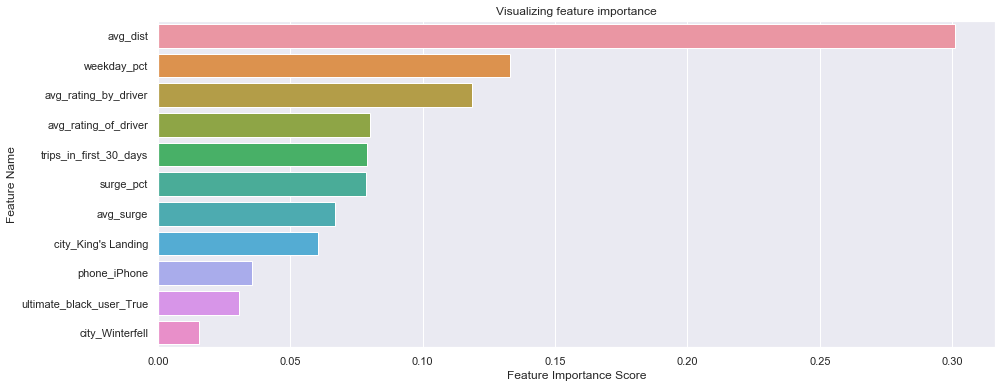

In [217]:
sns.barplot(x = imp_feature, y = imp_feature.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Visualizing feature importance")

RandomForestClassifier perfomed best on train data but second best on test data.

According to the feature importance matrix, avg_dist is the most significant to predict user rentention.

XGBClassifier performed best on the test data with 79.38% accuracy.

We can further fine tune and optimize the XGBoostClassifer.

### Optimization

In [219]:
# Optimizing XGBClasifier

from sklearn.model_selection import GridSearchCV

xgb2 = XGBClassifier()

parameters = {
    "eta" : [0.05, 0.1, 0.2, 0.25],
    "max_depth": [3, 5, 9, 12],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.2, 0.3]
}

grid = GridSearchCV(xgb, parameters, n_jobs=-1, scoring="neg_log_loss", cv=3)

grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster=None,
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints=None,
                                     n_estimators=100, n_jobs=...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method=None,
                                     validate_parameters=False,
             

In [221]:
print(grid.best_params_)
print(grid.best_score_)

{'eta': 0.05, 'gamma': 0.2, 'max_depth': 3, 'min_child_weight': 5}
-0.4527963238283755


In [225]:
xgb3 = XGBClassifier()
xgb3.set_params(**grid.best_params_)

xgb3.fit(X_train, y_train)
pred_train = xgb3.predict(X_train)
pred_test = xgb3.predict(X_test)

In [227]:
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_test = accuracy_score(y_test, pred_test)

accuracy_train, accuracy_test

(0.782, 0.7859)

Our default XGBoost model gives the best test accuracy of 79%.

We might fine tune the models with experimenting with  more parameters.

Few points to keep in mind:
1. The activeness of a user should be more precisely defined. Since we are not considering the exact date of singup, even a few days shift can show extreme changes in activeness of users.

2. The avg_dist and weekday_pct came out to be the significant factor in deciding the retention so the stakeholders should focus more on engaging the users in first 30 days.

3. iPhone users are more likely use the app more and in turn are more active. Hence the android app should be improved. 